In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [11]:
from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples=1000,
    n_features=20,
    n_informative=10,
    n_redundant=5,
    random_state=42
)

X = pd.DataFrame(X)


In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA()
X_pca = pca.fit_transform(X_scaled)


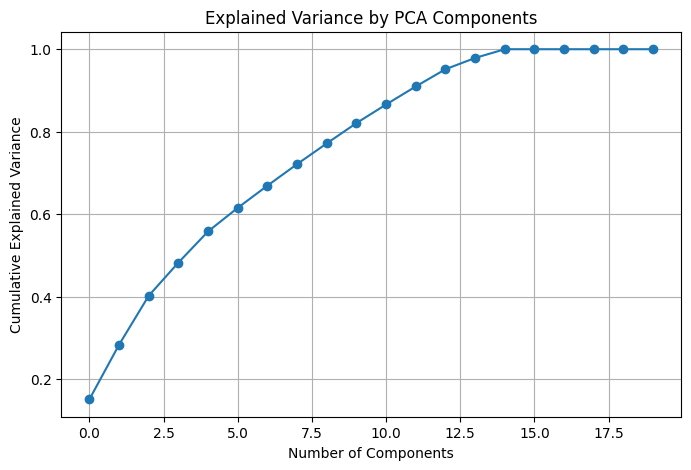

In [13]:
# VAriece Explaied
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(8,5))
plt.plot(np.cumsum(explained_variance), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid()
plt.show()


In [14]:
pca = PCA(n_components=0.90)  # keep 90% variance
X_reduced = pca.fit_transform(X_scaled)

X_reduced.shape


(1000, 12)

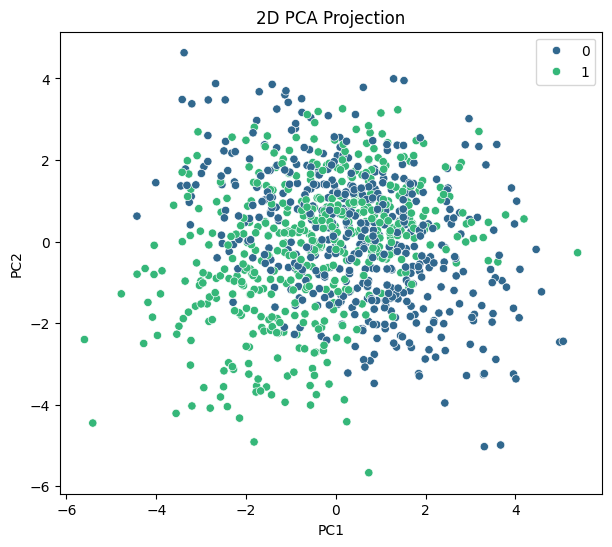

In [15]:
pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X_scaled)

plt.figure(figsize=(7,6))
sns.scatterplot(
    x=X_2d[:,0],
    y=X_2d[:,1],
    hue=y,
    palette='viridis'
)
plt.title('2D PCA Projection')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


In [16]:
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(pca.n_components_)],
    index=X.columns
)

loadings.head()


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,-0.282162,-0.102681,-0.307025,-0.017829,-0.098506,-0.257189,-0.324976,-0.108880,-0.255329,0.076492,0.159474,0.430229
1,0.032311,0.153415,0.350201,0.228778,-0.339521,0.072380,-0.082608,-0.019362,0.419014,0.083940,0.256419,0.144860
2,-0.102015,0.313939,0.070896,0.410454,-0.130613,0.015082,0.009134,0.057030,-0.354441,-0.093271,-0.339650,-0.165847
3,-0.339130,-0.188836,0.273446,0.104269,-0.319750,0.070892,0.045022,0.016962,-0.039784,-0.039712,-0.246312,-0.170011
4,-0.287684,0.062204,0.396960,-0.420210,0.041560,0.062877,0.109346,0.019086,-0.062997,-0.065103,-0.103808,-0.095288


In [17]:
print("Original shape:", X.shape)
print("Reduced shape:", X_reduced.shape)


Original shape: (1000, 20)
Reduced shape: (1000, 12)


The dimensionality reduction analysis shows that a small number of principal components capture a substantial proportion of the variance in the dataset, indicating strong correlations among the original features.

This suggests that the high-dimensional data can be effectively represented in a lower-dimensional space without significant information loss.

The PCA projection reveals clear structure and partial separation among observations, which supports its usefulness for visualization, noise reduction, and downstream tasks such as clustering and classification.

 When combined with clustering results from the previous day, the reduced dimensions help explain why certain groups emerge, as similar data points are positioned closer together in the transformed space.

The dimensionality reduction analysis shows that a small number of principal components capture a substantial proportion of the variance in the dataset, indicating strong correlations among the original features. This suggests that the high-dimensional data can be effectively represented in a lower-dimensional space without significant information loss.

The PCA projection reveals clear structure and partial separation among observations, which supports its usefulness for visualization, noise reduction, and downstream tasks such as clustering and classification.

When combined with clustering results from the previous day, the reduced dimensions help explain why certain groups emerge, as similar data points are positioned closer together in the transformed space.